In [126]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.loading import *
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
def _format_axis(ax):
    ax.grid()
    ax.set_xlim(-5.5, 5.5)
    ax.set_ylim(-5.5, 5.5)
    ax.set_xlabel(r'$a_{conv}$', fontsize=12)
    ax.set_ylabel(r'$a_{strat}$', fontsize=12)

# gSAM

In [109]:
# Load PCs
#
pcs = load_gsam_eofs_pcs().scores()
pcs = pcs/pcs.std(('lat', 'lon', 'time'))
# Load 2d data
#
data_2d = load_coarse_gsam_2d()
# Set bins for PCs and make plotting mesh
#
pc_bins = np.arange(-10, 10, 0.5)
xmesh, ymesh = np.meshgrid(array_midpoints(pc_bins), array_midpoints(pc_bins))

Text(0.5, 1.0, 'gSAM Precipitable Water [mm]')

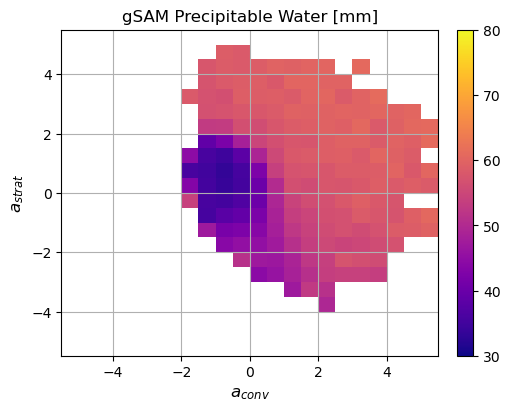

In [110]:
# Compute bin-mean PW and Precipitation
#
# PW:
#
data_to_bin = data_2d['PW']
obs_cutoff = 5
mean = binned_statistic_2d(
    pcs.sel(mode=2).data.ravel(), # y-coordinate first
    pcs.sel(mode=1).data.ravel(), # x-coordinate seconds
    data_to_bin.data.ravel(), 
    statistic=lambda x: np.nanmean(x) if x.size > obs_cutoff else np.nan, 
    bins=[pc_bins, pc_bins]
).statistic
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
c = ax.pcolormesh(
    xmesh,
    ymesh,
    mean,
    norm=colors.Normalize(vmin=30, vmax=80),
    cmap=plt.cm.plasma.copy()
)
_format_axis(ax)
fig.colorbar(c)
ax.set_title(f'gSAM Precipitable Water [mm]')

Text(0.5, 1.0, 'gSAM Precipitation [mm/d]')

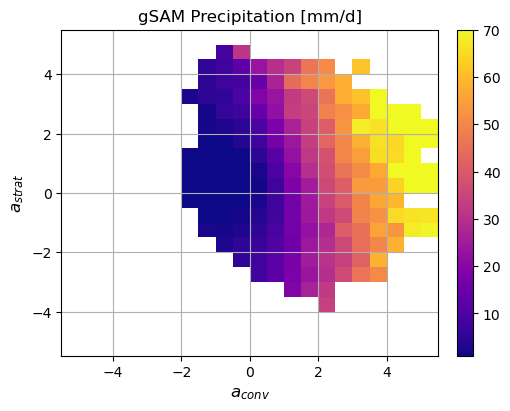

In [111]:

# Precipitation
#
data_to_bin = data_2d['Prec']
obs_cutoff = 5
mean = binned_statistic_2d(
    pcs.sel(mode=2).data.ravel(), # y-coordinate first
    pcs.sel(mode=1).data.ravel(), # x-coordinate seconds
    data_to_bin.data.ravel(), 
    statistic=lambda x: np.nanmean(x) if x.size > obs_cutoff else np.nan, 
    bins=[pc_bins, pc_bins]
).statistic
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
c = ax.pcolormesh(
    xmesh,
    ymesh,
    mean,
    norm=colors.Normalize(vmin=1, vmax=70),
    cmap=plt.cm.plasma.copy()
)
_format_axis(ax)
fig.colorbar(c)
ax.set_title(f'gSAM Precipitation [mm/d]')

# ERA5 Precip

In [145]:
# Load coarse precip
#
precip = load_era5_coarse_precip() * 1000 * 24 *3 # in convert from m/hr to mm/d

In [146]:
# Load PCs
#
pcs = load_era5_eofs_pcs().scores()
pcs = pcs.isel(time=pcs.time.dt.month==2)
pcs = pcs/pcs.std(('latitude', 'longitude', 'time'))
# Set bins for PCs and make plotting mesh
#
pc_bins = np.arange(-10, 10, 0.5)
xmesh, ymesh = np.meshgrid(array_midpoints(pc_bins), array_midpoints(pc_bins))

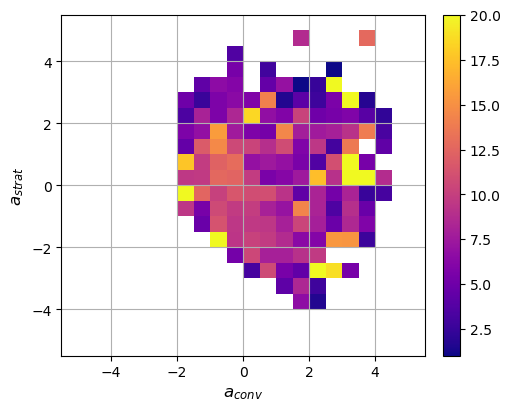

In [152]:
# Compute bin-mean PW and Precipitation
#
# PW:
#
data_to_bin = precip
obs_cutoff = 5
mean = binned_statistic_2d(
    pcs.sel(mode=2).data.ravel(), # y-coordinate first
    pcs.sel(mode=1).data.ravel(), # x-coordinate seconds
    data_to_bin.data.ravel(), 
    statistic=lambda x: np.nanmean(x) if x.size > obs_cutoff else np.nan, 
    bins=[pc_bins, pc_bins]
).statistic
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
c = ax.pcolormesh(
    xmesh,
    ymesh,
    mean,
    norm=colors.Normalize(vmin=1, vmax=20),
    cmap=plt.cm.plasma.copy()
)
_format_axis(ax)
fig.colorbar(c)
# ax.set_title(f'gSAM Precipitable Water [mm]')

# IMERG

In [113]:
# Load and coarsen IMERG data
# Convert from mm/hr ot mm/d
imerg = (load_imerg_data() * 24).coarsen({'lat': 20, 'lon': 20}).mean()


In [114]:
# Load PCs
#
pcs = load_era5_eofs_pcs().scores()
pcs = pcs.isel(time=pcs.time.dt.month==2)
pcs = pcs/pcs.std(('latitude', 'longitude', 'time'))
# Set bins for PCs and make plotting mesh
#
pc_bins = np.arange(-10, 10, 0.5)
xmesh, ymesh = np.meshgrid(array_midpoints(pc_bins), array_midpoints(pc_bins))

In [118]:
pcs

<xarray.DataArray 'scores' (mode: 10, time: 232, latitude: 10, longitude: 20)> Size: 4MB
array([[[[ 7.85754333e-03, -3.10816573e-01, -4.75867600e-01, ...,
           5.21558478e-01, -5.99378961e-02, -3.76450008e-01],
         [-3.22598945e-01, -4.50853940e-01, -4.62798310e-01, ...,
           4.34473559e-01,  3.47435954e-01, -7.27927121e-02],
         [-8.28169952e-01, -5.10931421e-01,  2.88521421e-01, ...,
           7.36337052e-01,  2.31730500e+00,  8.63246184e-01],
         ...,
         [-1.58260480e+00, -1.02205642e+00, -6.87118734e-01, ...,
          -4.12403609e-01, -8.09405626e-01, -5.93310549e-01],
         [-1.30205938e+00, -1.02027171e+00, -6.14625475e-01, ...,
          -6.25857687e-02, -2.36881759e-01, -3.96067043e-01],
         [-1.45115913e+00, -1.25078459e+00, -7.68168660e-01, ...,
           3.58696940e-01, -1.26050975e-01, -3.60841359e-01]],

        [[-2.48018146e-01,  2.57002434e-01,  7.89781149e-01, ...,
           6.84377212e-01,  9.88780017e-01,  9.94432380e-01],
         [-9.72389588e-03,  1.75624950e-01,  7.63969640e-01, ...,
          -8.29587617e-03,  4.99516246e-01,  9.53625883e-01],
         [-5.85919230e-01, -2.39245811e-01,  5.26853769e-02, ...,
           1.51123427e+00, -1.97968010e-01,  1.70691558e+00],
...
          -8.21716460e-01, -2.60839568e-01,  3.73285814e-01],
         [-1.01697615e+00,  8.44486276e-01,  3.43874184e-01, ...,
          -1.99940792e-01,  3.06016410e-01,  1.27824176e+00],
         [-4.53179365e-01, -5.32617123e-01, -2.38830493e-01, ...,
          -7.08239243e-01,  2.33631447e-01, -1.21379031e+00]],

        [[ 4.86931585e-01, -1.49977508e+00, -1.14076335e-01, ...,
           2.79993398e-01,  7.05397476e-01,  4.48646889e-01],
         [ 6.10054212e-01, -2.85605778e-01, -1.08262294e+00, ...,
          -6.00834178e-01,  9.56130486e-02,  2.79343826e-01],
         [ 1.38847917e+00,  6.88143965e-02,  6.52766305e-01, ...,
           1.28976366e+00, -1.51912591e+00, -1.33977058e+00],
         ...,
         [ 6.30633095e-01, -6.63703680e-01, -1.06442555e+00, ...,
           3.10058847e-01, -5.12669260e-01,  6.44162664e-01],
         [-1.51528218e+00,  2.11598369e+00,  1.06783154e+00, ...,
           1.70144711e+00,  8.32504752e-01,  8.59107421e-01],
         [ 2.11294901e+00, -1.13839271e+00,  2.45303015e-01, ...,
          -1.54438454e+00, -3.06433523e-01,  9.45995700e-01]]]],
      shape=(10, 232, 10, 20))
Coordinates:
  * time       (time) datetime64[ns] 2kB 2020-02-01 ... 2020-02-29T21:00:00
  * latitude   (latitude) float64 80B 1.125 3.125 5.125 ... 15.12 17.12 19.12
  * longitude  (longitude) float64 160B 130.9 132.9 134.9 ... 164.9 166.9 168.9
  * mode       (mode) int64 80B 1 2 3 4 5 6 7 8 9 10
Attributes: (12/15)
    model:          EOF analysis
    software:       xeofs
    version:        3.0.4
    date:           2025-08-12 15:43:37
    n_modes:        10
    center:         False
    ...             ...
    sample_name:    sample
    feature_name:   feature
    random_state:   None
    compute:        True
    solver:         auto
    solver_kwargs:  {}

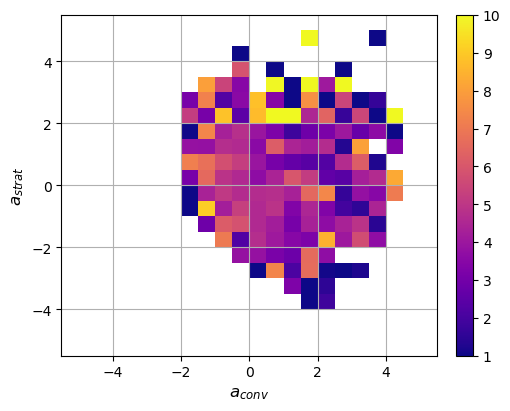

In [117]:
# Compute bin-mean PW and Precipitation
#
# PW:
#
data_to_bin = imerg
obs_cutoff = 5
mean = binned_statistic_2d(
    pcs.sel(mode=2).data.ravel(), # y-coordinate first
    pcs.sel(mode=1).data.ravel(), # x-coordinate seconds
    data_to_bin.data.ravel(), 
    statistic=lambda x: np.nanmean(x[x>0]) if x.size > obs_cutoff else np.nan, 
    bins=[pc_bins, pc_bins]
).statistic
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
c = ax.pcolormesh(
    xmesh,
    ymesh,
    mean,
    norm=colors.Normalize(vmin=1, vmax=10),
    cmap=plt.cm.plasma.copy()
)
_format_axis(ax)
fig.colorbar(c)
# ax.set_title(f'gSAM Precipitable Water [mm]')